In [1]:
!pip install requests

In [2]:
import time
import pandas as pd
import requests
import os
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r"C:\Users\lanmo\OneDrive\Документы")

In [3]:
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)

In [4]:
url = 'https://comtradeapi.un.org/files/v1/app/reference/Reporters.json'
dan = requests.get(url)

In [5]:
dan = dan.json()

In [6]:
dan['results']

[{'id': 4,
  'text': 'Afghanistan',
  'reporterCode': 4,
  'reporterDesc': 'Afghanistan',
  'reporterNote': 'Afghanistan',
  'reporterCodeIsoAlpha2': 'AF',
  'reporterCodeIsoAlpha3': 'AFG',
  'entryEffectiveDate': '1900-01-01T00:00:00',
  'isGroup': False},
 {'id': 8,
  'text': 'Albania',
  'reporterCode': 8,
  'reporterDesc': 'Albania',
  'reporterNote': 'Albania',
  'reporterCodeIsoAlpha2': 'AL',
  'reporterCodeIsoAlpha3': 'ALB',
  'entryEffectiveDate': '1900-01-01T00:00:00',
  'isGroup': False},
 {'id': 12,
  'text': 'Algeria',
  'reporterCode': 12,
  'reporterDesc': 'Algeria',
  'reporterNote': 'Algeria',
  'reporterCodeIsoAlpha2': 'DZ',
  'reporterCodeIsoAlpha3': 'DZA',
  'entryEffectiveDate': '1900-01-01T00:00:00',
  'isGroup': False},
 {'id': 20,
  'text': 'Andorra',
  'reporterCode': 20,
  'reporterDesc': 'Andorra',
  'reporterNote': 'Andorra',
  'reporterCodeIsoAlpha2': 'AD',
  'reporterCodeIsoAlpha3': 'AND',
  'entryEffectiveDate': '1900-01-01T00:00:00',
  'isGroup': False},


In [7]:
sclov = dict()

In [8]:
for i in dan['results']:
    id1 = i['id']
    name = i['text']
    Group = i['isGroup']
    if not Group:
        sclov[id1] = name

In [9]:
sclov

{4: 'Afghanistan',
 8: 'Albania',
 12: 'Algeria',
 20: 'Andorra',
 24: 'Angola',
 660: 'Anguilla',
 28: 'Antigua and Barbuda',
 886: 'Arab Rep. of Yemen (...1990)',
 32: 'Argentina',
 51: 'Armenia',
 533: 'Aruba',
 36: 'Australia',
 40: 'Austria',
 31: 'Azerbaijan',
 44: 'Bahamas',
 48: 'Bahrain',
 50: 'Bangladesh',
 52: 'Barbados',
 112: 'Belarus',
 56: 'Belgium',
 58: 'Belgium-Luxembourg (...1998)',
 84: 'Belize',
 204: 'Benin',
 60: 'Bermuda',
 64: 'Bhutan',
 68: 'Bolivia (Plurinational State of)',
 535: 'Bonaire',
 70: 'Bosnia Herzegovina',
 72: 'Botswana',
 92: 'Br. Virgin Isds',
 76: 'Brazil',
 96: 'Brunei Darussalam',
 100: 'Bulgaria',
 854: 'Burkina Faso',
 108: 'Burundi',
 132: 'Cabo Verde',
 116: 'Cambodia',
 120: 'Cameroon',
 124: 'Canada',
 136: 'Cayman Isds',
 140: 'Central African Rep.',
 148: 'Chad',
 152: 'Chile',
 156: 'China',
 344: 'China, Hong Kong SAR',
 446: 'China, Macao SAR',
 170: 'Colombia',
 174: 'Comoros',
 178: 'Congo',
 184: 'Cook Isds',
 188: 'Costa Rica'

In [10]:
rus_id = 643

In [11]:
Primary_key = '48b718d2cfe449d58f27d7d2e9faab5d'
Secondary_key = 'ac7d22f67fdf4583b339d01341c6e146'

In [12]:
typeCode = 'C'
freqCode = 'A'
clCode = 'HS'
url1 = f'https://comtradeapi.un.org/data/v1/get/{typeCode}/{freqCode}/{clCode}'

In [13]:
def get_data(rus_id,Primary_key,url1,year):
    params ={
    'subscription-key':Primary_key,
    'period':year,
    'cmdCode':'TOTAL',
    'reporterCode':rus_id
}
    try:
        link = requests.get(url1, params=params)
        response = link.json()
        data = pd.DataFrame(response['data'])
        data1 = data[['refYear', 'partnerCode', 'primaryValue', 'flowCode']].copy() 
        
        data1['name'] = data1['partnerCode'].map(sclov)
        data1 = data1.dropna()
        data1 = data1.rename(columns={
            'refYear': 'Year',
            'partnerCode': 'id',
            'primaryValue': 'Value',
            'flowCode': 'ex/im'
        })
        return data1
    except:
        return None

In [14]:
data = pd.DataFrame()
for year in range(2009,2022):
    data = pd.concat([data,get_data(rus_id,Primary_key,url1,year)],axis = 0,ignore_index=True)
    time.sleep(11)

In [15]:
data

,Year,id,Value,ex/im,name
0,2009,4,336000000.0000,X,Afghanistan
1,2009,8,53975403.0000,X,Albania
2,2009,12,1437000000.0000,X,Algeria
3,2009,24,24421628.0000,X,Angola
4,2009,31,1468000000.0000,X,Azerbaijan
...,...,...,...,...,...
7049,2021,152,775570621.9600,M,Chile
7050,2021,442,178655240.3200,M,Luxembourg
7051,2021,579,903143343.0100,M,Norway
7052,2021,208,1251105855.0500,M,Denmark


In [16]:
data = data[data['ex/im']!='RM']
data = data.drop_duplicates()

In [17]:
data

,Year,id,Value,ex/im,name
0,2009,4,336000000.0000,X,Afghanistan
1,2009,8,53975403.0000,X,Albania
2,2009,12,1437000000.0000,X,Algeria
3,2009,24,24421628.0000,X,Angola
4,2009,31,1468000000.0000,X,Azerbaijan
...,...,...,...,...,...
7049,2021,152,775570621.9600,M,Chile
7050,2021,442,178655240.3200,M,Luxembourg
7051,2021,579,903143343.0100,M,Norway
7052,2021,208,1251105855.0500,M,Denmark


In [18]:
exp = data[data['ex/im'] == 'X']
exp

,Year,id,Value,ex/im,name
0,2009,4,336000000.0000,X,Afghanistan
1,2009,8,53975403.0000,X,Albania
2,2009,12,1437000000.0000,X,Algeria
3,2009,24,24421628.0000,X,Angola
4,2009,31,1468000000.0000,X,Azerbaijan
...,...,...,...,...,...
6844,2021,478,15603128.6500,X,Mauritania
6845,2021,292,196158345.8600,X,Gibraltar
6846,2021,226,1577328.5100,X,Equatorial Guinea
6847,2021,204,37591900.5800,X,Benin


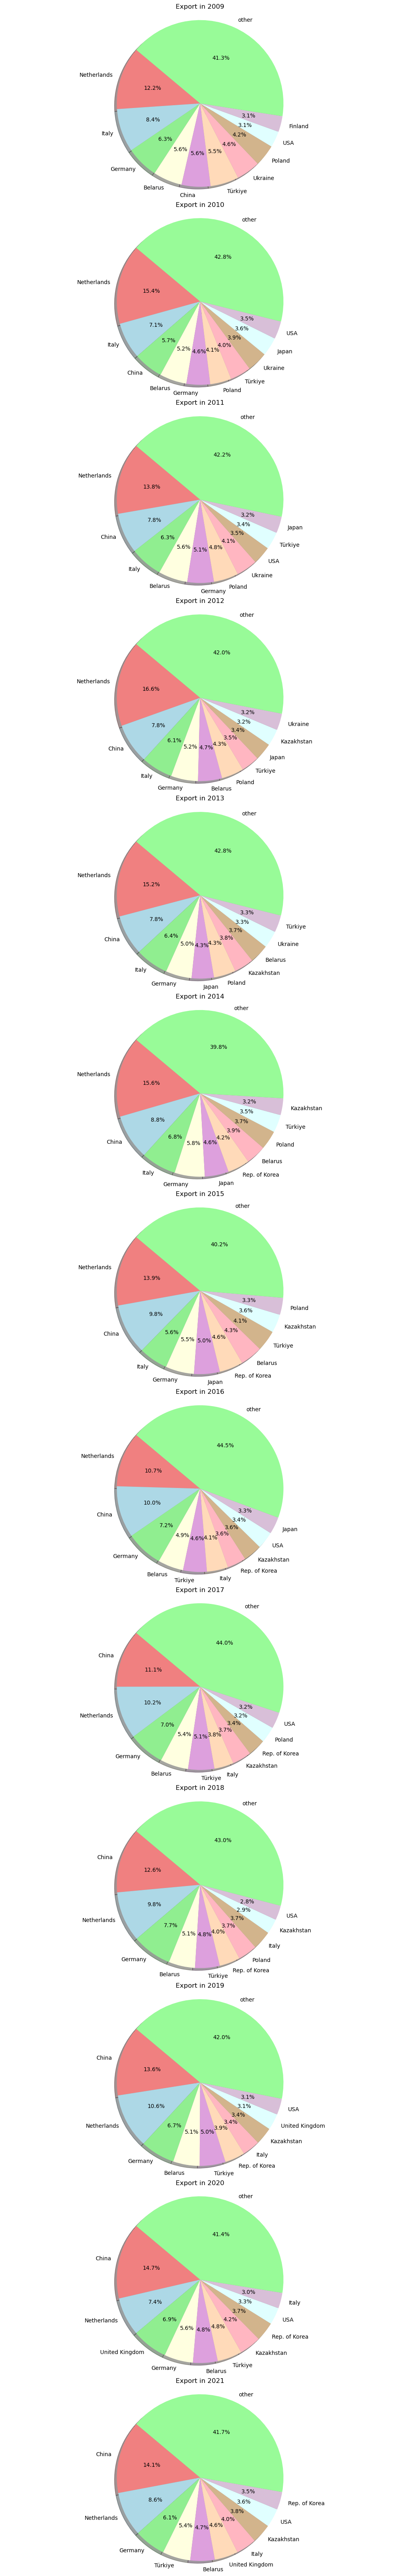

In [19]:
years = [i for i in range(2009, 2022)]
fig, axes = plt.subplots(len(years), 1, figsize=(10, 5*len(years)), constrained_layout=True)
for i in range(len(years)):
    year = years[i]
    exp_year = exp[exp['Year'] == year]
    exp_top10 = exp_year.sort_values(by='Value', ascending=False).head(10).copy()
    other = exp_year.sort_values(by='Value', ascending=False).copy().reset_index(drop=True)
    other = other.drop(index=range(10)).reset_index(drop=True)
    sum_other = other['Value'].sum()
    t11 = {'Year': year, 'name': 'other', 'Value': sum_other,'ex/im':'X'}
    exp_top10.loc[len(exp_top10)] = t11
    ax = axes[i]
    ax.pie(exp_top10['Value'], labels=exp_top10['name'], autopct='%1.1f%%', shadow=True, startangle=140, 
           colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'plum', 'peachpuff', 'lightpink', 'tan', 'lightcyan', 'thistle', 'palegreen', 'wheat'])
    ax.axis('equal')  # Это нужно для того, чтобы круговая диаграмма была круглой
    ax.set_title(f'Export in {year}')
plt.savefig('Rus_exp_2009-2022')
plt.show()

In [20]:
im = data[data['ex/im'] == 'M']
im

,Year,id,Value,ex/im,name
180,2009,8,4219577.0000,M,Albania
181,2009,12,6843573.0000,M,Algeria
182,2009,20,49642.0000,M,Andorra
183,2009,24,4711.0000,M,Angola
184,2009,4,15300000.0000,M,Afghanistan
...,...,...,...,...,...
7049,2021,152,775570621.9600,M,Chile
7050,2021,442,178655240.3200,M,Luxembourg
7051,2021,579,903143343.0100,M,Norway
7052,2021,208,1251105855.0500,M,Denmark


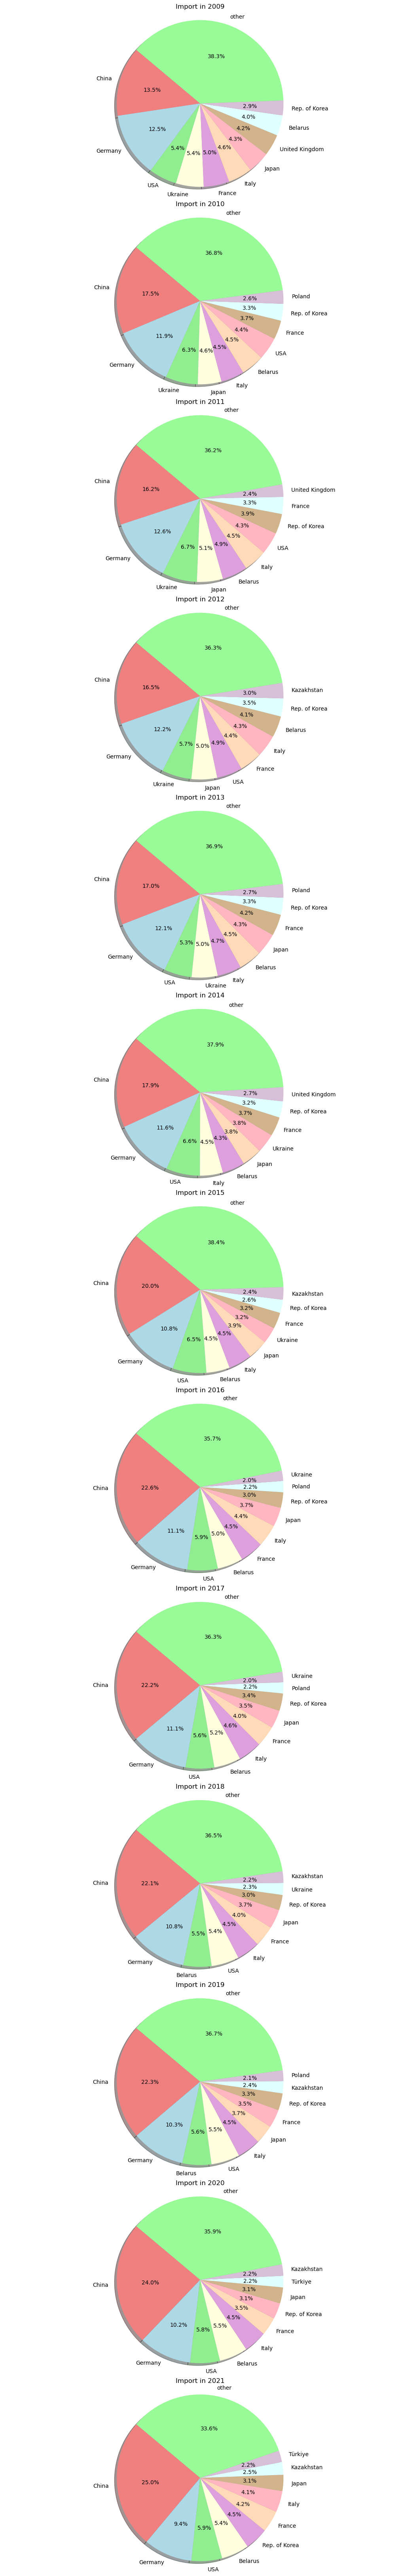

In [21]:
fig, axes = plt.subplots(len(years), 1, figsize=(10, 5*len(years)), constrained_layout=True)
years = [i for i in range(2009, 2022)]
for i in range(len(years)):
    year = years[i]
    im_year = im[im['Year'] == year]
    im_top10 = im_year.sort_values(by='Value', ascending=False).head(10).copy()
    other = im_year.sort_values(by='Value', ascending=False).copy().reset_index(drop=True)
    other = other.drop(index=range(10)).reset_index(drop=True)
    sum_other = other['Value'].sum()
    t11 = {'Year': year, 'name': 'other', 'Value': sum_other,'ex/im':'X'}
    im_top10.loc[len(im_top10)] = t11
    ax = axes[i]
    ax.pie(im_top10['Value'], labels=im_top10['name'], autopct='%1.1f%%', shadow=True, startangle=140, 
           colors=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'plum', 'peachpuff', 'lightpink', 'tan', 'lightcyan', 'thistle', 'palegreen', 'wheat'])
    ax.axis('equal')  # Это нужно для того, чтобы круговая диаграмма была круглой
    ax.set_title(f'Import in {year}')
plt.savefig('Rus_imp_2009-2022')
plt.show()

In [22]:
exp_china = exp[exp['name'] == 'China']
exp_china

,Year,id,Value,ex/im,name
32,2009,156,16669000000.0000,X,China
405,2010,156,19783043493.0000,X,China
772,2011,156,34692361997.0000,X,China
1153,2012,156,35766829504.0000,X,China
1544,2013,156,35625419978.0000,X,China
1929,2014,156,37414604118.0000,X,China
2326,2015,156,28334954570.0000,X,China
2922,2016,156,29953376571.0700,X,China
4126,2017,156,41671349422.8600,X,China
4344,2018,156,56019903783.5700,X,China


In [23]:
im_china = im[im['name'] == 'China']
im_china

,Year,id,Value,ex/im,name
217,2009,156,22859880130.0000,M,China
587,2010,156,38960930034.0000,M,China
960,2011,156,48038378329.0000,M,China
1341,2012,156,51767694478.0000,M,China
1732,2013,156,53173086207.0000,M,China
2118,2014,156,50853009519.0000,M,China
2516,2015,156,35199263948.0000,M,China
3090,2016,156,46332240945.2600,M,China
3510,2017,156,56950375658.8700,M,China
4794,2018,156,52217637368.7700,M,China


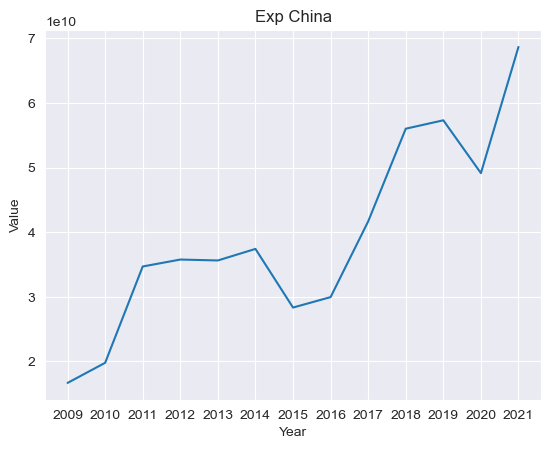

In [24]:
sns.set_style("darkgrid")
plt.plot(exp_china['Year'],exp_china['Value'])
plt.title('Exp China')
plt.ylabel('Value')
plt.xticks(np.arange(2009,2022))
plt.xlabel('Year')
plt.savefig('asd')
plt.show()

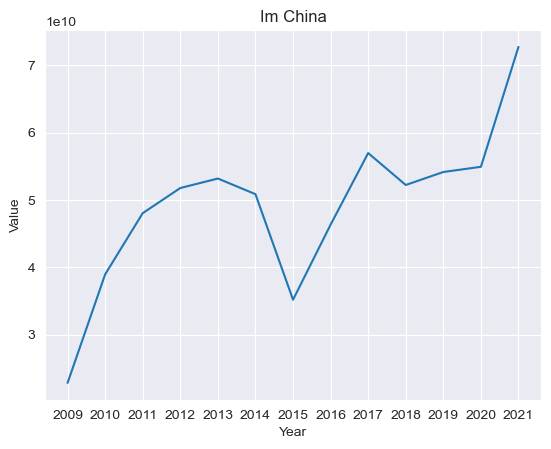

In [25]:
sns.set_style("darkgrid")
plt.plot(im_china['Year'],im_china['Value'])
plt.title('Im China')
plt.ylabel('Value')
plt.xticks(np.arange(2009,2022))
plt.xlabel('Year')
plt.savefig('asd')
plt.show()